# 基物实验数据处理包示例

该Notebook展示了基物实验data_utils的各种功能和用法，包括：
- 基本统计分析与直方图
- 线性回归分析
- 误差传递计算
- 数据导出
- 批量数据处理
- 其他实用功能

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from utils import *

# 设置中文字体
font = set_chinese_font()

## 示例1：基本统计分析与直方图

本示例展示如何对一组测量数据进行基本统计分析，计算置信区间，绘制频率分布直方图，并创建统计表格。

In [2]:
# 示例数据 - 某物理量的多次测量结果
data1 = [3.97, 4.06, 4.01, 3.94, 4.00, 4.06, 3.94, 4.03, 3.94, 4.06,
        3.97, 4.09, 4.06, 4.09, 4.06, 3.91, 3.94, 4.06, 4.06, 4.13]

### 1.1 计算基本统计量

使用`calculate_statistics`函数计算数据的基本统计量，包括均值、标准差、最大值、最小值等。

In [3]:
# 计算基本统计量
stats = calculate_statistics(data1)
print("基本统计量:")
for key, value in stats.items():
    print(f"{key}: {value}")

基本统计量:
count: 20
mean: 4.019
std: 0.063
max_value: 4.13
min_value: 3.91
median: 4.045
range_value: 0.22


### 1.2 计算置信区间

使用`calculate_confidence_intervals`函数计算不同置信水平下的置信区间。

In [4]:
# 计算置信区间
confidence_intervals = calculate_confidence_intervals(stats['mean'], stats['std'])
print("置信区间:")
for key, value in confidence_intervals.items():
    print(f"{key}: [{value[0]}, {value[1]}], 概率: {value[2]}")

置信区间:
68.0% 置信区间: [3.956, 4.082], 概率: 0.683
95.0% 置信区间: [3.896, 4.142], 概率: 0.949
99.0% 置信区间: [3.857, 4.181], 概率: 0.99


### 1.3 计算sigma区间概率

使用`calculate_sigma_probabilities`函数计算数据落在σ、2σ、3σ区间内的理论概率和实际概率。

In [5]:
# 计算sigma区间概率
sigma_probs = calculate_sigma_probabilities(data1, stats['mean'], stats['std'])
print("Sigma区间概率:")
for key, value in sigma_probs.items():
    print(f"{key}: 理论概率: {value[0]}, 实际概率: {value[1]}")

Sigma区间概率:
1σ: 理论概率: 0.683, 实际概率: 0.6
2σ: 理论概率: 0.954, 实际概率: 1.0
3σ: 理论概率: 0.997, 实际概率: 1.0


### 1.4 绘制频率分布直方图与正态分布拟合曲线

使用`plot_histogram_with_normal_fit`函数绘制频率分布直方图，并拟合正态分布曲线。

图中黑线是由数据均值和标准差计算得出的正态分布曲线，红线是用核密度估计法计算得出的概率密度曲线。

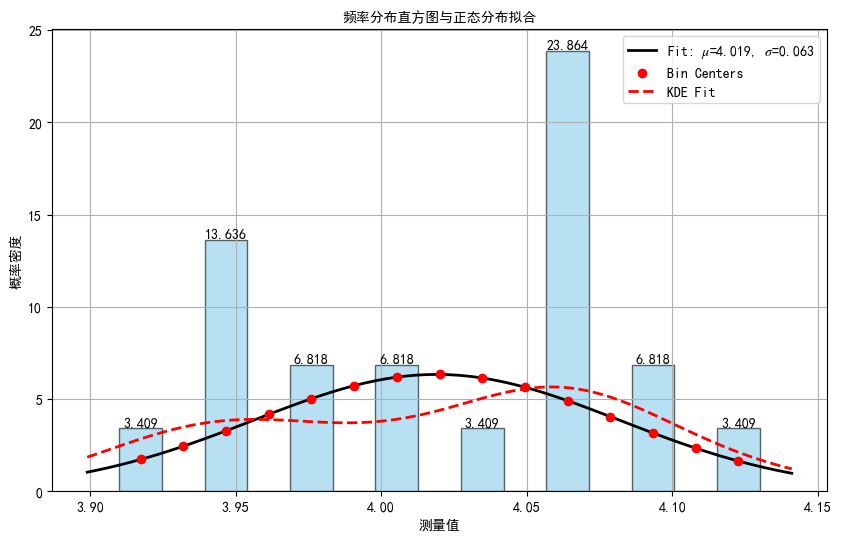

In [6]:
# 绘制频率分布直方图与正态分布拟合曲线
fig, bins, n = plot_histogram_with_normal_fit(data1, x_label='测量值', 
                                           title='频率分布直方图与正态分布拟合')
plt.savefig('示例1_直方图.png', bbox_inches='tight') # 不裁剪图片

### 1.5 创建统计信息表格

使用`create_statistics_table`和`plot_table`函数创建并绘制统计信息表格。

统计信息表格:


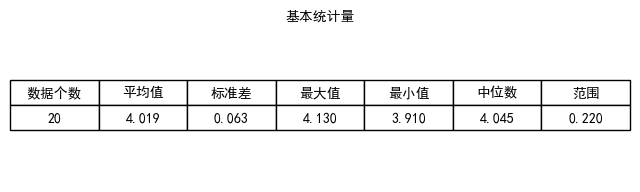

In [7]:
# 创建统计信息表格
stat_table = create_statistics_table(stats)
print("统计信息表格:")

# 绘制统计信息表格
fig_stat, ax_stat = plot_table(stat_table, figsize=(8, 2), 
                             title='基本统计量', save_path='示例1_统计表.png')

### 1.6 自动划分区间并计算区间统计量

使用`auto_create_intervals`和`calculate_interval_statistics`函数自动划分区间并计算区间统计量。

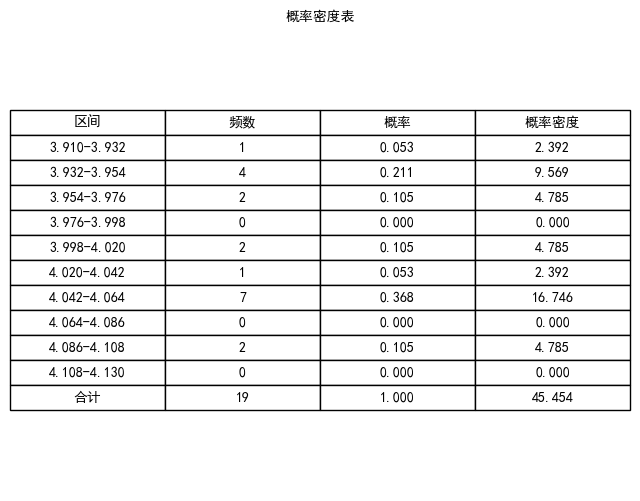

In [8]:
# 自动划分区间并计算区间统计量
intervals = auto_create_intervals(data1, num_intervals=10)
bin_counts, bin_probs, bin_densities, total_density = calculate_interval_statistics(data1, intervals)

# 创建概率密度表格
density_table = create_density_table(intervals, bin_counts, bin_probs, bin_densities)

# 绘制概率密度表格
fig_density, ax_density = plot_table(density_table, figsize=(8, 6), 
                                   title='概率密度表', save_path='示例1_密度表.png')

## 示例2：线性回归分析

本示例展示如何对一组数据进行线性回归分析，并绘制回归直线。

线性回归分析结果:
slope: 1.988
intercept: 0.056
r_squared: 0.999
std_error: 0.157
当x=5.5时，预测y值为: 10.990


d:\基物实验数据处理包\utils.py:564: UserWarning: Glyph 178 (\N{SUPERSCRIPT TWO}) missing from font(s) SimHei.
  plt.savefig(save_path, bbox_inches='tight')
d:\miniconda\envs\phyexp\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 178 (\N{SUPERSCRIPT TWO}) missing from font(s) SimHei.
  fig.canvas.print_figure(bytes_io, **kw)


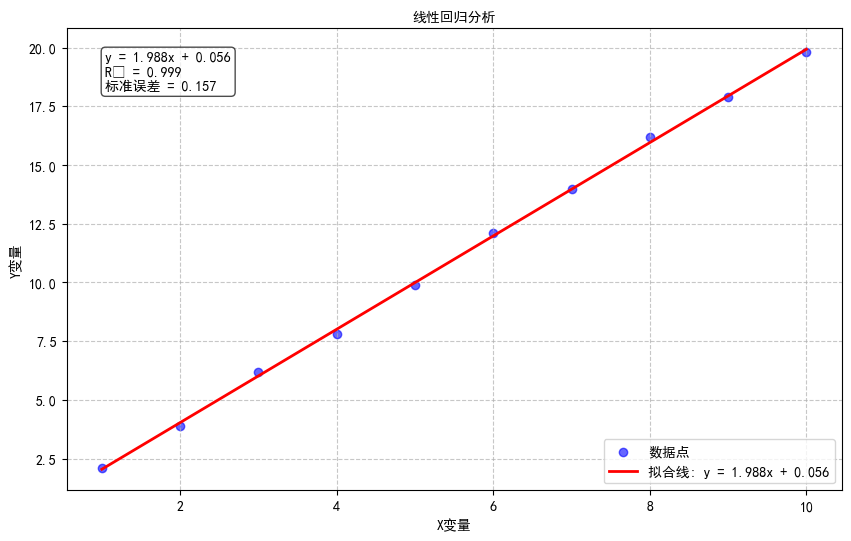

In [9]:
# 示例数据 - 某物理实验的自变量和因变量
x = np.array([1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0])
y = np.array([2.1, 3.9, 6.2, 7.8, 9.9, 12.1, 14.0, 16.2, 17.9, 19.8])

# 进行线性回归分析
reg_results = linear_regression(x, y)
print("线性回归分析结果:")
for key, value in reg_results.items():
    if key != 'prediction':
        print(f"{key}: {value}")

# 使用回归方程进行预测
x_new = 5.5
y_pred = reg_results['prediction'](x_new)
print(f"当x={x_new}时，预测y值为: {y_pred:.3f}")

# 绘制线性回归图
fig_reg, ax_reg, _ = plot_linear_regression(x, y, x_label='X变量', y_label='Y变量', 
                                         title='线性回归分析', save_path='示例2_线性回归.png')

## 示例3：不确定度计算

本示例展示如何使用 `calculate_uncertainty_a`，`calculate_uncertainty_b`计算A、B类不确定度，使用`combine_uncertainties` 函数合并不确定度，使用`uncertainty_propagation`传递不确定度。

注意：请查看utils.py中的函数说明，以便于传递参数。
作者可以自行定义需要传递不确定度的函数。作者上完课后，会将完整的函数封装到utils.py中。

In [ ]:
#以重力加速度计算为例
def pendulum_gravity(L, T):
    """
    4 * (np.pi**2) * (L + D/2) / (T**2)
    """
    return 4 * (np.pi**2) * L / (T**2)

# 1. 实验数据
# 单摆长度及其不确定度
L = [75.3,75.35,75.37,75.36,75.37] #cm
L_mean = np.mean(L)/100  #m
mu_L_A = calculate_uncertainty_a(L)/100
#小球直径及其不确定度
D = [20.00,20.00,20.00,20.00,20.00] #mm
D_mean = np.mean(D)/1000 #m
mu_D_A = 0
# 单摆50个周期的时间及其不确定度
period_data = [
    87.85,7.75,88.15,87.60,87.63,87.80
]
T_mean = np.mean(period_data)/50 #s
mu_T_A = calculate_uncertainty_a(period_data)/50

mu_L_B = calculate_uncertainty_b(estimation=0.0005,resolution=0.0008,distribution="normal")
mu_D_B = calculate_uncertainty_b(estimation=0.00002,resolution=0.00002,distribution="uniform")
mu_T_B = calculate_uncertainty_b(estimation=0.2,resolution=0.01,distribution="normal")

mu_L = combine_uncertainties(t=2.78,mu_a=mu_L_A,kp=1.96,mu_b=mu_L_B)
mu_D = combine_uncertainties(t=2.78,mu_a=mu_D_A,kp=1.90,mu_b=mu_D_B)
mu_T = combine_uncertainties(t=2.78,mu_a=mu_T_A,kp=1.96,mu_b=mu_T_B)

result,uncertainty = uncertainty_propagation(pendulum_gravity,
     values=[L_mean,D_mean,T_mean],uncertainties=[mu_L,mu_D,mu_T],variables=["L","D","T"])
    
print(result,"±",uncertainty)

13.412 ± 13.563


## 示例4：数据导出

本示例展示如何将数据导出为CSV和Excel文件。

In [ ]:
# 创建示例数据
data_dict = {
    '测量值': data1,
    '预测值': [reg_results['prediction'](val) for val in data1],
    '误差': [abs(reg_results['prediction'](val) - val) for val in data1]
}

# 导出为CSV文件
export_success = export_data(data_dict, '示例4_数据导出.csv')
print(f"CSV导出{'成功' if export_success else '失败'}")

# 导出为Excel文件
export_success = export_data(data_dict, '示例4_数据导出.xlsx', format='excel')
print(f"Excel导出{'成功' if export_success else '失败'}")

数据已成功导出到: 示例4_数据导出.csv
CSV导出成功
数据已成功导出到: 示例4_数据导出.xlsx
Excel导出成功


### 4.1 导出为文本文件

除了CSV和Excel格式外，还可以将数据导出为文本文件。

In [ ]:
# 导出为文本文件
export_success = export_data(data_dict, '示例4_数据导出.txt', format='txt')
print(f"文本文件导出{'成功' if export_success else '失败'}")

数据已成功导出到: 示例4_数据导出.txt
文本文件导出成功


## 示例5：批量数据处理

本示例展示如何对多组数据进行批量处理。

In [ ]:
# 创建多组数据
data_groups = [
    np.random.normal(10, 1, 50),  # 均值10，标准差1的正态分布
    np.random.normal(15, 2, 50),  # 均值15，标准差2的正态分布
    np.random.normal(20, 1.5, 50)  # 均值20，标准差1.5的正态分布
]

# 批量计算统计量
stats_results = batch_process(data_groups, calculate_statistics)

# 显示结果
for i, stats in enumerate(stats_results):
    print(f"数据组 {i+1} 的统计结果:")
    for key, value in stats.items():
        print(f"{key}: {value}")

SyntaxError: EOL while scanning string literal (2982347678.py, line 13)

### 5.1 批量绘制直方图

使用`batch_process`函数批量绘制多组数据的直方图。

In [ ]:
# 定义一个简化的直方图绘制函数
def plot_hist_simple(data, title_suffix=''):
    stats = calculate_statistics(data)
    mean, std = stats['mean'], stats['std']
    title = f'直方图 {title_suffix} (μ={mean:.2f}, σ={std:.2f})'
    fig, _, _ = plot_histogram_with_normal_fit(data, title=title)
    return fig

# 批量绘制直方图
hist_figs = batch_process(data_groups, plot_hist_simple, title_suffix='批量处理')

# 显示第一个图形作为示例
plt.figure(hist_figs[0].number)
plt.show()

## 示例6：原始数据表生成

本示例展示如何生成原始数据表，类似于`原始数据表生成.py`中的功能。

In [ ]:
# 更多测量数据
more_data = [3.97, 4.06, 4.01, 3.94, 4.00, 4.06, 3.94, 4.03, 3.94, 4.06,
        3.97, 4.09, 4.06, 4.09, 4.06, 3.91, 3.94, 4.06, 4.06, 4.13,
        4.00, 4.00, 4.06, 3.97, 4.03, 4.06, 3.94, 4.06, 4.00, 4.06,
        4.03, 4.06, 4.03, 4.02, 4.00, 4.18, 4.00, 3.97, 4.03, 4.12]

# 将数据转换为 Pandas DataFrame，重新组织成4行10列的表格
df = pd.DataFrame(more_data).T.values.reshape(4, 10)
df = pd.DataFrame(df).applymap(lambda x: f"{x:.3f}" if isinstance(x, float) else x)

# 绘制原始数据表
fig, ax = plt.subplots(figsize=(8, 4))  # 根据数据量调整图片高度
ax.axis('off')  # 不显示坐标轴
ax.table(cellText=df.values, cellLoc='center', loc='center')  # 绘制表格
plt.title('原始数据表', fontproperties=font)
plt.savefig('原始数据表.png', bbox_inches='tight')  # 保存原始数据表为图片
plt.show()  # 显示原始数据表

## 示例7：更复杂的误差传递计算

本示例展示如何计算更复杂的误差传递问题。

In [ ]:
# 圆柱体的半径、高度及其测量误差
radius = 2.5  # 单位：cm
height = 10.0  # 单位：cm
radius_error = 0.05  # 单位：cm
height_error = 0.1  # 单位：cm

# 定义计算圆柱体体积的函数
def cylinder_volume(r, h):
    "3.14159 * r**2 * h"  # 这里的字符串会被error_propagation函数用作函数表达式
    return np.pi * r**2 * h

# 计算体积及其误差
volume, volume_error = error_propagation(cylinder_volume, [radius, height], [radius_error, height_error], ['r', 'h'])

print(f"圆柱体尺寸: 半径 = {radius} ± {radius_error} cm, 高度 = {height} ± {height_error} cm")
print(f"计算体积: {volume} ± {volume_error} cm³")
print(f"相对误差: {(volume_error/volume*100):.2f}%")

## 示例8：自定义区间宽度

本示例展示如何使用自定义区间宽度进行数据分析。

In [ ]:
# 使用指定的区间宽度划分区间
intervals_custom = auto_create_intervals(data1, interval_width=0.05)
bin_counts_custom, bin_probs_custom, bin_densities_custom, total_density_custom = calculate_interval_statistics(data1, intervals_custom)

# 创建概率密度表格
density_table_custom = create_density_table(intervals_custom, bin_counts_custom, bin_probs_custom, bin_densities_custom)
print("自定义区间宽度的概率密度表格:")
print(density_table_custom)

# 绘制概率密度表格
fig_density_custom, ax_density_custom = plot_table(density_table_custom, figsize=(8, 8), 
                                               title='自定义区间宽度的概率密度表')

## 总结

本Notebook展示了基物实验数据处理包的各种功能，包括：
1. 基本统计分析与直方图
2. 线性回归分析
3. 误差传递计算
4. 数据导出
5. 批量数据处理
6. 原始数据表生成
7. 更复杂的误差传递计算
8. 自定义区间宽度分析

这些功能可以帮助物理实验数据的处理和分析，提高实验报告的质量和效率。